## Praca domowa 1 - raport

W zadaniu należy przeprowadzić eksplorację zbioru danych znajdującego się tutaj: https://www.apispreadsheets.com/datasets/129.
Po przeprowadzonej przeze mnie eksploracji, dodam akapit dotyczący wykorzystania przeze mnie narzędzia automatycznej eksploracji danych wraz z opisem plusów i minusów wykorzystania takowego.

### Eksploracja zbioru danych

Na początek zaimportuję wszystkie potrzebne pakiety oraz plik z danymi.

In [266]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import math
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')

Następnie wczytamy dane i wyświetlimy kilka pierwszych wierszy, tak by się wstępnie z nimi zapoznać.

In [68]:
forest_df=pd.read_csv('forest_fires_dataset.csv')
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


#### Podstawowe informacje o zbiorze:

Następnie zapoznam się trochę z tymi danymi - poprzez wyświetlenie kilku informacji o nich (np nazwy atrybutów, ich opisy).

In [3]:
forest_df.keys()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

X - współrzędna x na mapie parku Montesinho, wartości od 1 do 9, liczba całkowita

Y - współrzędna y na mapie parku Montesinho, wartości od 2 do 9, liczba całkowita

month - miesiąc w roku, wartości od 'jan' do 'dec', string

day - dzień tygodnia, wartości od 'mon' do 'sun', string

FFMC - "The Fine Fuel Moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy.", wartości między 18.7 a 96.2, liczba zmiennoprzecinkowa

DMC - "The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter.", wartości między 1.1 a 291.3

DC - "The Drought Code (DC) represents drying deep into the soil.", wartości między 7.9 a 860.6, liczba zmiennoprzecinkowa

ISI - "The Initial Spread Index (ISI) integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential.", wartości między 0.0 a 56.1, liczba zmiennoprzecinkowa

temp - temperatura podana w stopniach Celsiusza, wartości pomiędzy 2.2 a 33.30, liczba zmiennoprzecinkowa

RH - wilgotność wzglądna podana w procentach, wartości między 15.0 a 100, liczba zmiennoprzecinkowa

wind - prędkość wiatru w $\frac{km}{h}$, wartości między 0.4 a 9.4, liczba zmiennoprzecinkowa

rain - deszcz w $\frac{mm}{m^2}$, wartości między 0.0 a 6.4, liczba zmiennoprzecinkowa

area - spalona powierzchnia lasu (podana w hektarach), wartości między 0.0 a 1090.84, liczba zmiennoprzecinkowa

Zobaczymy teraz czy nasze dane zawierają dużo wartości Null - jeśli jakaś kolumna będzie zawierała ich większość to może warto pomyśleć nad wyrzuceniem jej, jako że hipotetycznie zawiera mało danych.

In [9]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null float64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Ale jak widać żadna nie zawiera Nulli. 

##### Zamiana month i day na liczby

Jak mogliśmy zobaczyć w opisach kolejnych atrybutów, month oraz day nie są wartościami liczbowymi, więc będzie nam bardzo trudno na nich działać, jeśli ich nie zamienimy.

In [34]:
df=forest_df
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


Zamiana miesięcy

In [35]:
df.loc[df['month']=='jan', 'month']=1
df.loc[df['month']=='feb', 'month']=2
df.loc[df['month']=='mar', 'month']=3
df.loc[df['month']=='apr', 'month']=4
df.loc[df['month']=='may', 'month']=5
df.loc[df['month']=='jun', 'month']=6
df.loc[df['month']=='jul', 'month']=7
df.loc[df['month']=='aug', 'month']=8
df.loc[df['month']=='sep', 'month']=9
df.loc[df['month']=='oct', 'month']=10
df.loc[df['month']=='nov', 'month']=11
df.loc[df['month']=='dec', 'month']=12
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


Zamiana dni tygodnia


In [36]:
df.loc[df['day']=='mon', 'day']=1
df.loc[df['day']=='tue', 'day']=2
df.loc[df['day']=='wed', 'day']=3
df.loc[df['day']=='thu', 'day']=4
df.loc[df['day']=='fri', 'day']=5
df.loc[df['day']=='sat', 'day']=6
df.loc[df['day']=='sun', 'day']=7
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


##### Rozkład wartości

No to zobaczmy teraz jak wygląda rozkład poszczególnych wartości w poszczególnych kolumnach - minimum, maksimum a także kwantyle. Zobaczmy to również na wykresie.

In [37]:
forest_df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


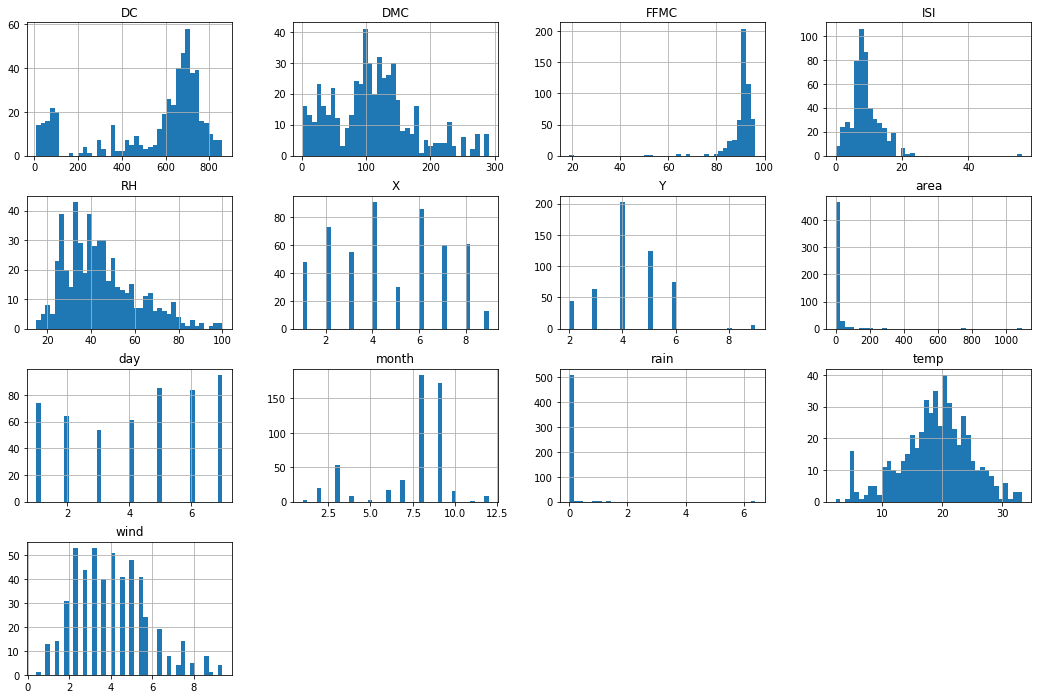

In [38]:
forest_df.hist(bins = 40, figsize=(18,12))
plt.show()

Przyjrzyjmy się bliżej wykresom dotyczącym dni oraz miesięcy.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1D5E62F88>]],
      dtype=object)

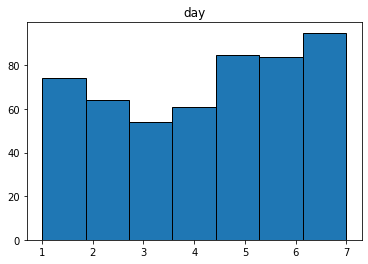

In [65]:
df.hist('day', bins = 7, grid=False, ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1D53E4FC8>]],
      dtype=object)

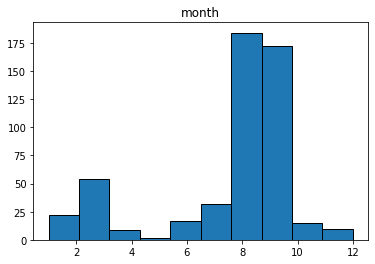

In [72]:
df.hist('month', grid=False, ec='black')

Jak widać na powyższych wykresach, dane pochodzą głównie z dwóch miesięcy w roku - sierpnia i września. Pochodzą one ze wszystkich dni tygodnia. Rain oraz area mają w znacznej większości bardzo małe wartości. Dla FFMC znaczna większość obserwacji jest zbliżona do 100. Wykresy dla temp, wind oraz rh mają wygląd zbliżony do wykresu rozkładu normalnego.

Zobaczymy w takim razie ile obserwacji dla area jest faktycznie równa 0, a ile dla rain. 

In [58]:
print('Obserwacje mające area równe 0: ', len(df[df.area==0]), ', co stanowi ', 
      math.floor(len(df[df.area==0])/len(df)*100), '% wszystkich obserwacji.' )

Obserwacje mające area równe:  247 , co stanowi  47 % wszystkich obserwacji.


In [59]:
print('Obserwacje mające rain równe 0: ', len(df[df.rain==0]), ', co stanowi ', 
      math.floor(len(df[df.rain==0])/len(df)*100), '% wszystkich obserwacji.' )

Obserwacje mające rain równe 0:  509 , co stanowi  98 % wszystkich obserwacji.


Rain jest kolumną, która jest bardzo dobrym kandydatem do usunięcia - dla większości obserwacji ma taką samą wartość.

##### Outliery

W tej części chcemy zobaczyć czy dla area mamy do czynienia z jakimiś obserwacjami odstającymi - zobaczmy to na podstawie boxplota.

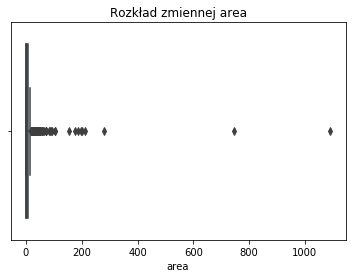

In [86]:
plot_box=sns.boxplot(df['area'])
plot_box.set_title('Rozkład zmiennej area')
plt.show()

Czyli widzimy, że mamy bardzo niewiele wartości powyżej 150, usuńmy je i narysujmy boxplot jeszcze raz.

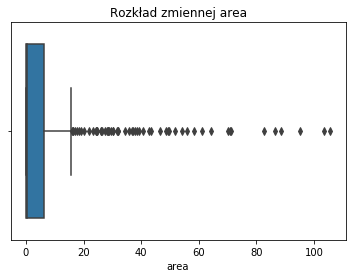

In [90]:
df=df.loc[df['area']<150]
plot_box=sns.boxplot(df['area'])
plot_box.set_title('Rozkład zmiennej area')
plt.show()

Widzimy, że duża część obserwacji skupiona jest wokół małych wartości. Ale jest też dość spora część z wartościami powyżej 20. Zobaczmy jak będzie teraz wyglądał wykres gęstości naszej zmiennej area.

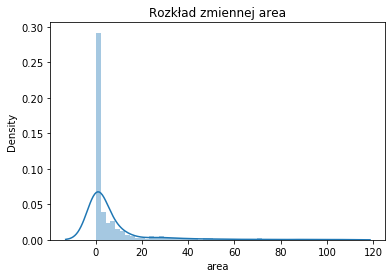

In [93]:
area_dist = sns.distplot(df['area'])
area_dist.set_title('Rozkład zmiennej area')
plt.show()

Mógłby wyglądać lepiej, może jeśli narysujemy rozkład logarytmu tej zmiennej o będzie lepiej.

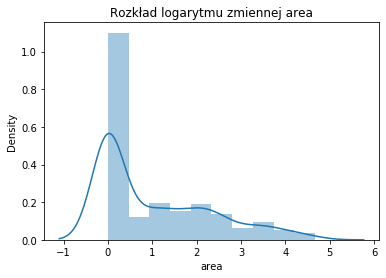

In [94]:
area_log_dist = sns.distplot(np.log1p(df['area']))
area_log_dist.set_title('Rozkład logarytmu zmiennej area')
plt.show()

Jest trochę lepiej, ale nie idealnie.

##### Zależności między kolumnami

Warto byłoby zobaczyć czy po usunięciu części obserwacji (odstających pod względem area) któreś z kolumn nie mają np takich samych wartości dla praktycznie wszystkich pomiarów.

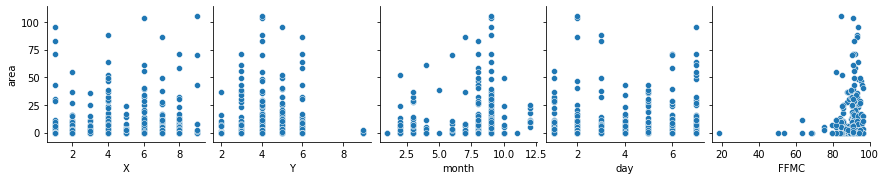

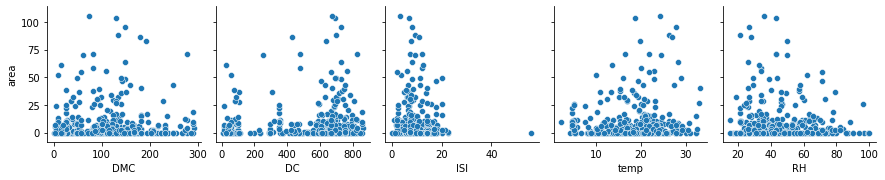

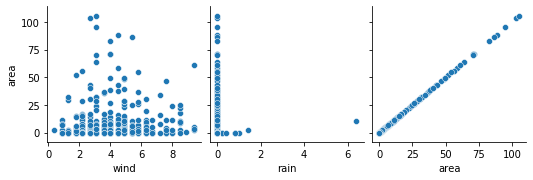

In [97]:
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[:5],diag_kind=None)
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[5:10],diag_kind=None)
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[10:],diag_kind=None)
plt.show()

Zwróćmy uwagę na wykresy dotyczące FFMC, ISI, rain oraz Y. Y jest odpowiedzialny za współrzędne, tak więc nie będziemy uważać tych kilku pomiarów z wartością 9 jako odstające, jednak w pozostałych wykresach możemy usunąć te pojedyncze, odstające obserwacje.

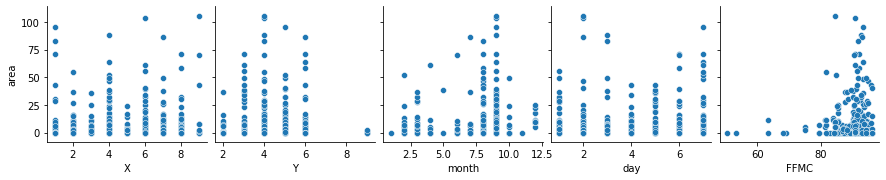

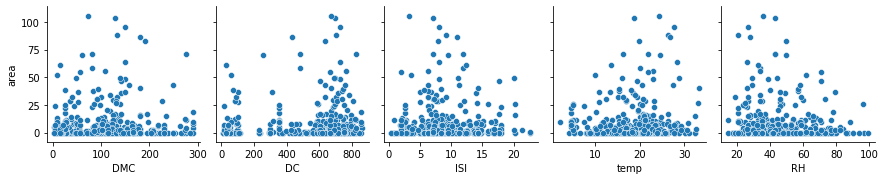

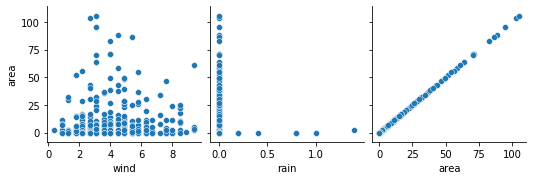

In [98]:
df=df.loc[df['FFMC']>40] 
df=df.loc[df['ISI']<40]
df=df.loc[df['rain']<4]
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[:5],diag_kind=None)
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[5:10],diag_kind=None)
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[10:],diag_kind=None)
plt.show()

In [99]:
print('Obserwacje mające rain równe 0: ', len(df[df.rain==0]), ', co stanowi ', 
      math.floor(len(df[df.rain==0])/len(df)*100), '% wszystkich obserwacji.' )

Obserwacje mające rain równe 0:  498 , co stanowi  98 % wszystkich obserwacji.


Patrząc na powyższe wykresy możemy znów stwierdzić, że kolumna rain będzie raczej mało użyteczna, dalej mamy 98% wszystkich obserwacji o takiej samej wartości.

##### Położenie

Przed chwilą zwróciliśmy uwagę już na kolumny zawierające dane o współrzędnych, zajmimy się więc teraz tą kwestią. 

In [161]:
x_count = df['X'].value_counts()
x_count

4    89
6    85
2    71
8    58
7    57
3    55
1    47
5    30
9    13
Name: X, dtype: int64

In [184]:
y_count = df['Y'].value_counts()
y_count= y_count.sort_index()
y_count

2     41
3     64
4    201
5    121
6     72
9      6
Name: Y, dtype: int64

Jak widać w kolumnie X występują wszystkie wartości, a w kolumnie Y brakuje 1,7 i 8. Poniżej znajduje się heatmapa pokazująca położenie punktów, które najczęściej występowały w naszych danych.

Text(0.5, 1, 'Położenie pomiarów')

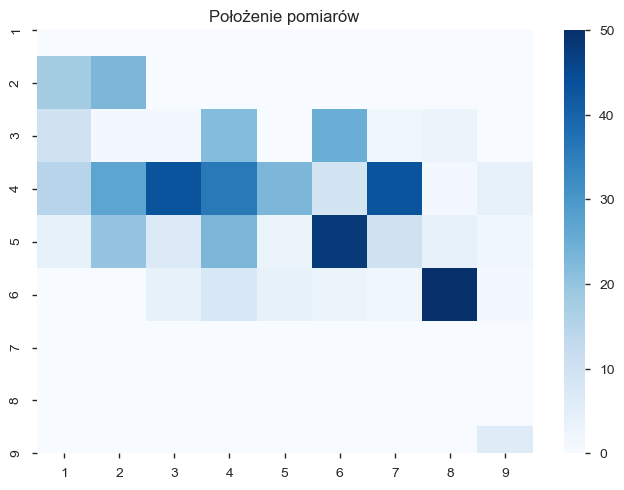

In [274]:
df_cross = pd.crosstab(df.Y, df.X)
y_1=[0,0,0,0,0,0,0,0,0,0]
df2 = pd.DataFrame([y_1,y_1,y_1], index=[1,7,8])
df_new= df_cross.append(df2)
df_new=df_new
del df_new[0]
df_new.sort_index(inplace=True)
sns.heatmap(df_new, cmap="Blues")
plt.title('Położenie pomiarów')

Wygląda jakby dane pochodziły w większości z jeszcze bardziej zawężonego obszaru niż to co sugeruje zakres danych.

##### Automatyczna EDA - pandas-profiling

In [271]:
forest_df=pd.read_csv('forest_fires_dataset.csv')
profile = ProfileReport(forest_df)
profile.to_file("automatic_EDA_output.html")

##### Wnioski:
* Bardzo wygodne narzędzie, trzy linijki kodu i mamy wynik w osobnym pliku.
* Jednak nie jest to tak dokładna analiza, jaką sami możemy zrobić - zawiera relatywnie niewiele różnorodnych analiz.
* Przy automatycznym tworzeniu nie poznajemy danych, przy samodzielnej analizie musimy popatrzeć i pomyśleć co dla nas będzie istotniejsze, dzięki temu znamy lepiej dane.
* Taka analiza jest ogólna, dla wszystkich danych przeprowadzana w podobnym schemacie. A my np możemy potrzebować szczególnego spojrzenia, ze względu na specyfikę danych, której to informacji pandas-profiling nie będzie posiadał.
* Po użyciu pandas-profiling mamy wynik, ale tak naprawdę nie wiemy skąd on się wziął, więc w razie błędów nie będziemy w stanie szybko ich zlokalizować. 
* Co więcej na koniec przeprowadzanej przez nas analizy, mamy prztworzone dane i możemy dalej na nich działać. Przy użyciu pandas-profiling, dostajemy plik html.

Podsumowując - jeśli nie mamy czasu na samodzielną analizę, takie narzędzie na pewno pomoże, ale lepsza byłaby samodzielna analiza, dopasowana do konkretnego problemu.